 Zomato Data Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("Zomato data .csv")

In [9]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [11]:
df["name"].head()


0                    Jalsa
1           Spice Elephant
2          San Churro Cafe
3    Addhuri Udupi Bhojana
4            Grand Village
Name: name, dtype: object

In [12]:
df.describe()


,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [13]:
def changetype(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

df["rate"]=df["rate"].apply(changetype)
df.head()    

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [14]:
#to display the number of user use different listed_in types

Text(0.5, 0, 'hlo')

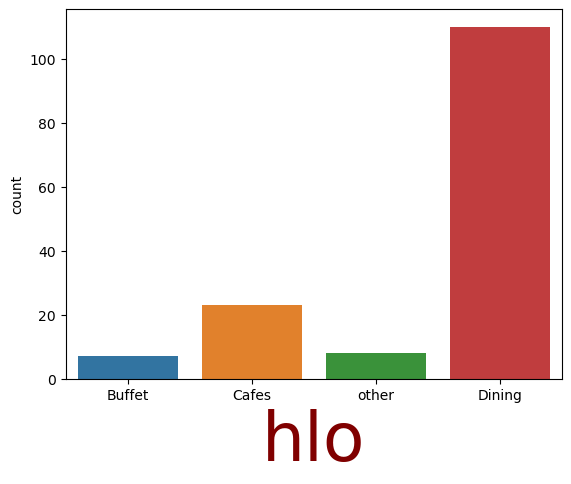

In [15]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("hlo",c="maroon",size=49)


Text(0, 0.5, 'votes')

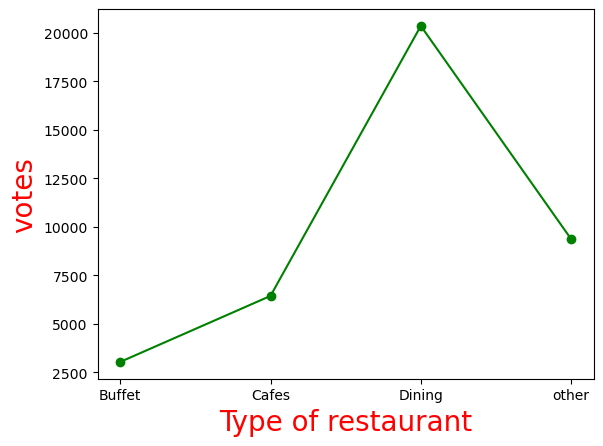

In [16]:
grouped=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)

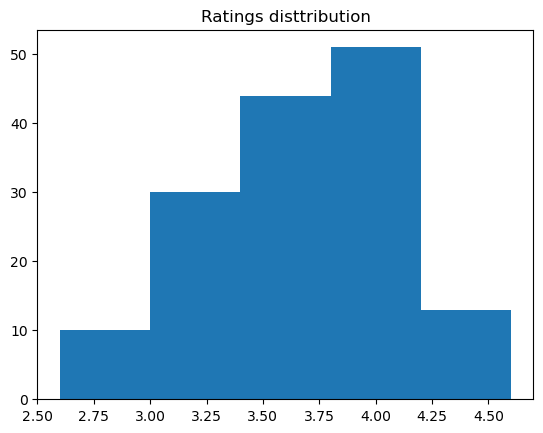

In [17]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings disttribution")
plt.show()

conclusion : the majority of restaurants received ratings from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

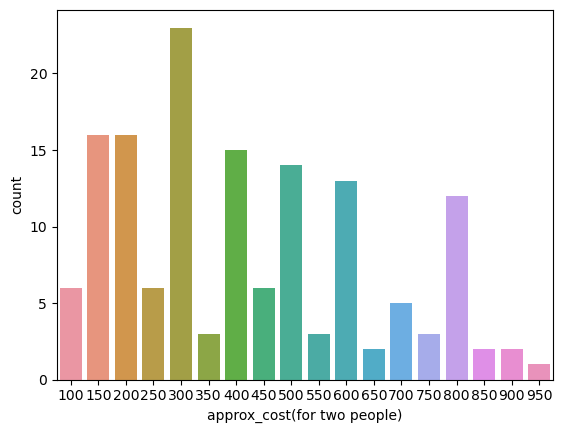

In [19]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

whether online orders recieve higher ratings than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

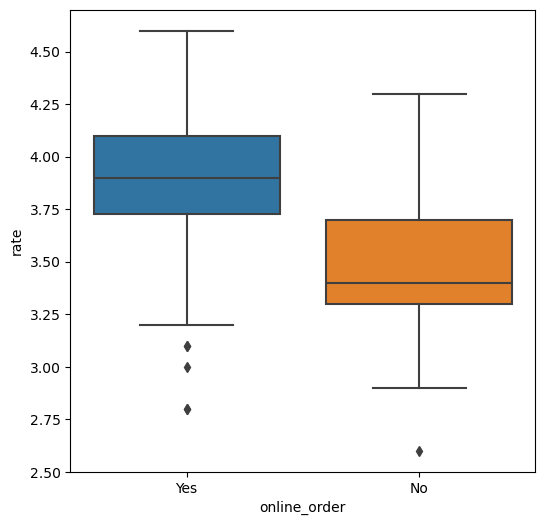

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

conclusion: offline orders received lower ratings in comparison to online orders,which obtained excellent ratings.

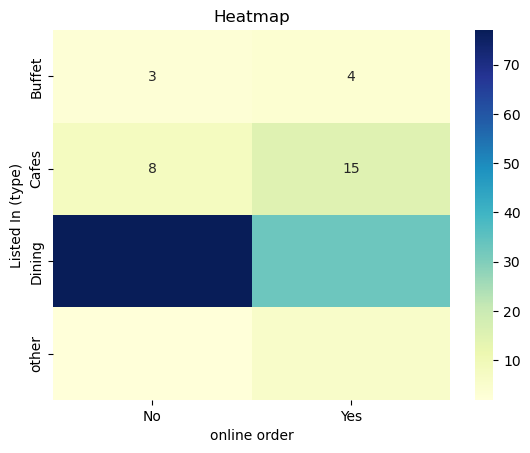

In [36]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size')
sns.heatmap(pivot_table,annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("Listed In (type)")
plt.show()

Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily recieve online orders. The suggests that clients prefer to place orders in pereson at restaurants, but prefer online ordering at cafes.